In [1]:
import pandas as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme.expressions import log
import math
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pums = "us_estdata_full.csv"
acs = "ACS_2018.csv"
lodes = "wac_puma.csv"
lpuma = "leave_puma.csv"
migpuma_acs_file = "ACS_MIGPUMA_2018.csv"
migpuma_lodes_file = "wac_migpuma.csv"

In [4]:
# pums = "us_estdata_2017.csv"
# acs = "ACS_2017_new.csv"
# lodes = "wac_puma_2017.csv"
# lpuma = "leave_puma_2017.csv"
# migpuma_acs_file = "data/ACS_MIGPUMA_2017_new.csv"
# migpuma_lodes_file = "data/wac_migpuma_2017.csv"

In [5]:
df = pd.read_csv(
    f"../data/{pums}",
    usecols=[
        "NAICS",
        "SERIALNO",
        "SCHG",
        "AGEP",
        "NATIVITY",
        "PAOC",
        "ESR",
        "MAR",
        "MARHD",
        "MARHW",
        "MARHM",
        "MIL",
        "TYPE_ORIG",
        "STAY",
        "CHOSEN",
        "ORIGIN",
        "FES",
        "HHT",
        "CBSA_NAME_ORIG",
        "UNEMP_PCT_ORIG_ADJ",
        "PINCP_ORIG_ADJ",
        "HH_MED_VAL_ORIG",
        "SMOCP_ORIG_ADJ",
        "GRNTP_ORIG_ADJ",
        "OWN_JOB_ORIG",
        "TOT_JOBS_ORIG",
        "MIGSP",
        "POBP",
        "SCHL",
        "child",
        "REC_CHILD",
    ],
)
df

,SERIALNO,AGEP,MAR,MARHD,MARHM,MARHW,MIL,SCHG,SCHL,ESR,...,NAICS,HH_MED_VAL_ORIG,TOT_JOBS_ORIG,PINCP_ORIG_ADJ,SMOCP_ORIG_ADJ,GRNTP_ORIG_ADJ,UNEMP_PCT_ORIG_ADJ,OWN_JOB_ORIG,TYPE_ORIG,CBSA_NAME_ORIG
0,2018GQ0000049,19,5,NaN,NaN,NaN,4.0,15.0,18.0,6.0,...,RET,217900.000000,91687,37000.0,1019.5,1028.0,0.027939,8536,1,168.0
1,2018GQ0000058,18,5,NaN,NaN,NaN,4.0,15.0,18.0,6.0,...,FOD,136400.000000,44030,36000.0,819.0,846.5,0.045455,3653,0,161.0
2,2018GQ0000219,53,5,NaN,NaN,NaN,4.0,NaN,17.0,6.0,...,PUB,143756.972263,166367,40000.0,856.5,915.0,0.039870,0,1,127.0
3,2018GQ0000246,28,5,NaN,NaN,NaN,2.0,NaN,19.0,6.0,...,NaN,109000.000000,43827,30700.0,623.5,687.0,0.071856,0,3,-1.0
4,2018GQ0000251,25,5,NaN,NaN,NaN,4.0,NaN,12.0,6.0,...,MFG,130301.073819,177381,35150.0,771.5,860.0,0.057325,18404,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530894,2018HU1400326,41,3,2.0,2.0,2.0,4.0,NaN,18.0,1.0,...,MED,207700.000000,53153,45000.0,959.0,850.0,0.018330,7425,3,-1.0
2530895,2018HU1400326,34,5,NaN,NaN,NaN,4.0,NaN,21.0,1.0,...,EDU,207700.000000,53153,45000.0,959.0,850.0,0.018330,4856,3,-1.0
2530896,2018HU1400502,49,3,2.0,2.0,2.0,4.0,NaN,19.0,1.0,...,MED,290600.000000,54624,44650.0,960.0,831.0,0.012712,8056,3,-1.0
2530897,2018HU1400502,19,5,NaN,NaN,NaN,4.0,NaN,16.0,1.0,...,AGR,290600.000000,54624,44650.0,960.0,831.0,0.012712,882,3,-1.0


In [6]:
df["MED"] = np.where(df["NAICS"] == "MED", 1, 0)
df["MFG"] = np.where(df["NAICS"] == "MFG", 1, 0)
df["RET"] = np.where(df["NAICS"] == "RET", 1, 0)
df["EDU"] = np.where(df["NAICS"] == "EDU", 1, 0)
df["ADM"] = np.where(df["NAICS"] == "ADM", 1, 0)
df["FOD"] = np.where(df["NAICS"] == "FOD", 1, 0)
df["PRF"] = np.where(df["NAICS"] == "PRF", 1, 0)
df["TRN"] = np.where(df["NAICS"] == "TRN", 1, 0)
df["SRV"] = np.where(df["NAICS"] == "SRV", 1, 0)
df["FIN"] = np.where(df["NAICS"] == "FIN", 1, 0)
df["WHL"] = np.where(df["NAICS"] == "WHL", 1, 0)
df["AGR"] = np.where(df["NAICS"] == "AGR", 1, 0)
df["PUB"] = np.where(df["NAICS"] == "PUB", 1, 0)
df["INF"] = np.where(df["NAICS"] == "INF", 1, 0)
df["ENT"] = np.where(df["NAICS"] == "ENT", 1, 0)
df["REL"] = np.where(df["NAICS"] == "REL", 1, 0)
df["UTL"] = np.where(df["NAICS"] == "UTL", 1, 0)
df["EXT"] = np.where(df["NAICS"] == "EXT", 1, 0)
df["MNG"] = np.where(df["NAICS"] == "MNG", 1, 0)
df["CON"] = np.where(df["NAICS"] == "CON", 1, 0)
df["NO_IND"] = np.where(df["NAICS"].isna(), 1, 0)

In [7]:
df

,SERIALNO,AGEP,MAR,MARHD,MARHM,MARHW,MIL,SCHG,SCHL,ESR,...,AGR,PUB,INF,ENT,REL,UTL,EXT,MNG,CON,NO_IND
0,2018GQ0000049,19,5,NaN,NaN,NaN,4.0,15.0,18.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,2018GQ0000058,18,5,NaN,NaN,NaN,4.0,15.0,18.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,2018GQ0000219,53,5,NaN,NaN,NaN,4.0,NaN,17.0,6.0,...,0,1,0,0,0,0,0,0,0,0
3,2018GQ0000246,28,5,NaN,NaN,NaN,2.0,NaN,19.0,6.0,...,0,0,0,0,0,0,0,0,0,1
4,2018GQ0000251,25,5,NaN,NaN,NaN,4.0,NaN,12.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530894,2018HU1400326,41,3,2.0,2.0,2.0,4.0,NaN,18.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2530895,2018HU1400326,34,5,NaN,NaN,NaN,4.0,NaN,21.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2530896,2018HU1400502,49,3,2.0,2.0,2.0,4.0,NaN,19.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2530897,2018HU1400502,19,5,NaN,NaN,NaN,4.0,NaN,16.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
# clean up the database (Biogeme Database can only have numerical values)
# df = df.select_dtypes(['number'])
df = df.fillna(0)

In [9]:
df["IN_COLLEGE"] = np.where((df["SCHG"] == 15) | (df["SCHG"] == 16), 1, 0)
df["IN_COLLEGE"]

0          1
1          1
2          0
3          0
4          0
          ..
2530894    0
2530895    0
2530896    0
2530897    0
2530898    0
Name: IN_COLLEGE, Length: 2530899, dtype: int32

In [10]:
df["STAY"].value_counts()

STAY
1    2202915
0     327984
Name: count, dtype: int64

In [11]:
df["AGE_18_34"] = np.where(df["AGEP"] <= 34, 1, 0)
df["AGE_35_64"] = np.where((df["AGEP"] >= 35) & (df["AGEP"] <= 64), 1, 0)
df["AGE_OVER_65"] = np.where((df["AGEP"] >= 65), 1, 0)
df["FOREIGN"] = np.where(df["NATIVITY"] == 2, 1, 0)

In [12]:
df["AGE_18_22"] = np.where(df["AGEP"] <= 22, 1, 0)
df["AGE_23_29"] = np.where((df["AGEP"] >= 23) & (df["AGEP"] <= 29), 1, 0)
df["AGE_30_39"] = np.where((df["AGEP"] >= 30) & (df["AGEP"] <= 39), 1, 0)
df["AGE_40_49"] = np.where((df["AGEP"] >= 40) & (df["AGEP"] <= 49), 1, 0)
df["AGE_50_64"] = np.where((df["AGEP"] >= 50) & (df["AGEP"] <= 64), 1, 0)

In [13]:
df["AGEP"].describe()

count    2.530899e+06
mean     5.002470e+01
std      1.886097e+01
min      1.800000e+01
25%      3.400000e+01
50%      5.100000e+01
75%      6.400000e+01
max      9.600000e+01
Name: AGEP, dtype: float64

In [14]:
df["EDU_LESS_HIGH"] = np.where(df["SCHL"] <= 15, 1, 0)
df["EDU_HIGH"] = np.where((df["SCHL"] <= 20) & (df["SCHL"] >= 16), 1, 0)
df["EDU_COLLEGE"] = np.where(df["SCHL"] >= 21, 1, 0)
# df["EDU_NOCOLLEGE"] = np.where(df["EDU_COLLEGE"] == 0, 1, 0)

In [15]:
# df["WOMAN_CHILD"] = np.where((df["PAOC"] >= 1) & (df["PAOC"] <= 3), 1, 0)
# df["UNEMPLOYED"] = np.where(df["ESR"] == 3, 1, 0)

In [16]:
# df["MALE"] = np.where(df["SEX"] == 1, 1, 0)
# df["FEMALE"] = np.where(df["SEX"] == 0, 1, 0)

In [17]:
df["MARRIED"] = np.where(df["MAR"] == 1, 1, 0)

In [18]:
# df["child_old"] = np.where(df["child"] == df["REC_CHILD"], 0, df["child"])
# df["child_old"].value_counts()
df["child"].value_counts()

child
0    1755972
1     774927
Name: count, dtype: int64

In [19]:
df["REC_NO_MAR"] = np.where((df["MARHD"] == 1) | (df["MARHW"] == 1), 1, 0)
df["REC_NO_MAR"].value_counts()

REC_NO_MAR
0    2495055
1      35844
Name: count, dtype: int64

In [20]:
df["MARHM_new"] = np.where(df["MARHM"] == 2, 0, df["MARHM"])
df["MARHM_new"].value_counts()

MARHM_new
0.0    2488855
1.0      42044
Name: count, dtype: int64

In [21]:
# df["married_old"] = np.where((df["MARHM"] == df["MARRIED"]), 0, df["MARRIED"])
# df["married_old"].value_counts()

In [22]:
df["MILITARY"] = np.where(df["MIL"] == 1, 1, 0)

In [23]:
# up to debate still
df["AGR_EXT"] = np.where((df["AGR"] == 1) | (df["EXT"] == 1), 1, 0)
df["HIGH_ED"] = np.where(
    (df["MED"] == 1)
    | (df["EDU"] == 1)
    | (df["PRF"] == 1)
    | (df["MED"] == 1)
    | (df["FIN"] == 1)
    | (df["INF"] == 1)
    | (df["MED"] == 1),
    1,
    0,
)
df["LICENSE"] = np.where((df["SRV"] == 1) | (df["REL"] == 1), 1, 0)
df["OTHER_JOB"] = np.where(
    (df["AGR_EXT"] == 0)
    & (df["HIGH_ED"] == 0)
    & (df["LICENSE"] == 0)
    & (df["NO_IND"] == 0),
    1,
    0,
)

In [24]:
df["MICRO_adj_ORIG"] = np.where((df["TYPE_ORIG"] == 3) | (df["TYPE_ORIG"] == 2), 1, 0)
df["METRO"] = np.where(df["TYPE_ORIG"] == 1, 1, 0)
df["T34"] = np.where(df["TYPE_ORIG"] == 0, 1, 0)

In [25]:
df["UNEMPLOYED"] = np.where((df["ESR"] == 3) | (df["ESR"] == 6), 1, 0)
df["IN_LF"] = np.where(df["ESR"] == 6, 0, 1)

In [26]:
df["WORK2_MAR"] = np.where(df["FES"] == 1, 1, 0)
df["WORK1_MAR"] = np.where((df["FES"] <= 4) & (df["FES"] >= 2), 1, 0)
df["OTHER_FAMILY"] = np.where((df["HHT"] == 2) | (df["HHT"] == 3), 1, 0)

In [27]:
df.loc[df["CBSA_NAME_ORIG"] == -1, "CBSA_NAME_ORIG"] = -2

In [28]:
df["MIGSP_ORIG"] = df["ORIGIN"].astype(str).str.zfill(7).str[0:2].astype(int)

In [29]:
df.memory_usage().sum()

1154090072

In [30]:
# reading in external data
puma_acs_data = pd.read_csv(f"../data/{acs}")
puma_lodes_data = pd.read_csv(f"../data/{lodes}")

puma_acs_data = puma_acs_data.set_index("PUMA")
puma_lodes_data = puma_lodes_data.set_index("puma")

# puma_acs_data = puma_acs_data[~puma_acs_data["Geo_STATE"].isin([2, 15, 72])]

# puma_acs_data.index = puma_recodes.loc[puma_acs_data.index].values.reshape((-1))
# puma_lodes_data.index = puma_recodes.loc[puma_lodes_data.index].values.reshape((-1))

puma_acs_data.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_LOGRECNO,Geo_STATE,Geo_PUMA5,Total Population,Population Density (Per Sq. Mile),...,Civilian Population 18 Years and Over Veteran,Civilian Population 18 Years and Over Veteran 18 to 64 Years,Civilian Population 18 Years and Over Veteran 65 Years and Over,Civilian Population 18 Years and Over Nonveteran,Civilian Population 18 Years and Over Nonveteran 18 to 64 Years,Civilian Population 18 Years and Over Nonveteran 65 Years and Over,Total Population Native Born,Total Population Foreign Born,Total Population Foreign Born Naturalized Citizen,Total Population Foreign Born Not a Citizen
PUMA,,,,,,,,,,,,,,,,,,,,,
100100,100100,79500US0100100,"Lauderdale, Colbert, Franklin & Marion (Northe...","Lauderdale, Alabama",al,57,1,100,184923,223.027706,...,9722,4332,5390,136809,105950,30859,178843.0,6080.0,1312.0,4768.0
100200,100200,79500US0100200,Limestone & Madison (Outer) Counties--Huntsvil...,Limestone & Madison (Outer) Counties--Huntsvil...,al,58,1,200,196618,237.132544,...,16167,9728,6439,135089,114171,20918,190579.0,6039.0,3440.0,2599.0
100301,100301,79500US0100301,Huntsville (North) & Madison (East) Cities PUM...,Huntsville (North) & Madison (East) Cities PUM...,al,59,1,301,133112,1459.688320,...,12813,8417,4396,91051,75831,15220,123801.0,9311.0,4154.0,5157.0
100302,100302,79500US0100302,"Huntsville City (Central & South) PUMA, Alabama","Huntsville City (Central & South) PUMA, Alabama",al,60,1,302,101737,1634.875764,...,8523,5271,3252,71585,57043,14542,95354.0,6383.0,3075.0,3308.0
100400,100400,79500US0100400,"DeKalb & Jackson Counties PUMA, Alabama","DeKalb & Jackson Counties PUMA, Alabama",al,61,1,400,123121,148.490962,...,5845,2846,2999,89462,70118,19344,117038.0,6083.0,669.0,5414.0


In [31]:
# reading in MIGPUMA-PUMA distance data
distances = pd.read_csv("../data/puma_distance_matrix_fixed.csv").set_index(
    "Unnamed: 0"
)
distances.index = distances.index.astype(int)
distances.columns = distances.columns.astype(int)
# distances.columns = puma_recodes.loc[distances.columns.astype(int)].values.reshape((-1))
distances

,600105,600102,608502,600108,600107,600101,600110,608504,600109,600106,...,2602200,2600900,4702402,4702300,4702401,4700500,4702501,5310400,5310300,5310100
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
600100,2.811224e+04,2.811224e+04,39057.0,2.811224e+04,2.811224e+04,2.811224e+04,2.811224e+04,32785.0,2.811224e+04,2.811224e+04,...,3659560.0,3658028.0,3704534.0,3707792.0,3697348.0,3709156.0,3675491.0,1510819.0,1366000.0,1521187.0
600700,2.676500e+05,2.541540e+05,308889.0,2.933460e+05,2.845210e+05,2.477670e+05,2.743320e+05,302616.0,2.903600e+05,2.738470e+05,...,3548479.0,3546947.0,3757628.0,3748449.0,3750726.0,3741417.0,3716148.0,1293877.0,1149057.0,1304245.0
601100,3.420630e+05,3.285670e+05,383302.0,3.677590e+05,3.589340e+05,3.221800e+05,3.618530e+05,377029.0,3.647730e+05,3.482590e+05,...,3646878.0,3645346.0,3856026.0,3846847.0,3849125.0,3839816.0,3814546.0,1246358.0,1101538.0,1256725.0
601300,5.418500e+04,4.434600e+04,90212.0,8.001100e+04,6.752000e+04,4.544600e+04,6.876300e+04,83940.0,7.168300e+04,5.517000e+04,...,3635231.0,3633699.0,3743085.0,3746342.0,3735899.0,3747707.0,3714042.0,1486490.0,1341670.0,1496858.0
601500,4.872780e+05,4.737820e+05,528517.0,5.129740e+05,5.041490e+05,4.673950e+05,5.070680e+05,522244.0,5.099870e+05,4.934740e+05,...,3594176.0,3592644.0,3803325.0,3794145.0,3796423.0,3787114.0,3761844.0,1149082.0,1004262.0,1159450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304007,3.996091e+06,4.004766e+06,3970737.0,3.980928e+06,3.987472e+06,4.012807e+06,3.958553e+06,3961958.0,3.991797e+06,3.985390e+06,...,1210028.0,1269788.0,373179.0,429406.0,391176.0,457262.0,418124.0,4143960.0,4251644.0,4527073.0
5151000,4.385759e+06,4.394434e+06,4360405.0,4.370596e+06,4.377141e+06,4.402476e+06,4.348221e+06,4351626.0,4.381466e+06,4.375058e+06,...,917732.0,1041456.0,718843.0,663499.0,695569.0,705881.0,692139.0,4231226.0,4338910.0,4661344.0
5151001,4.543694e+06,4.530198e+06,4542272.0,4.569390e+06,4.560565e+06,4.523811e+06,4.547511e+06,4533493.0,4.566404e+06,4.549890e+06,...,1050887.0,1169711.0,900710.0,845366.0,877436.0,887748.0,874006.0,4350356.0,4458040.0,4780474.0


In [32]:
puma_recodes = pd.factorize(df["CHOSEN"].unique())[1]
puma_recodes = pd.DataFrame(
    index=puma_recodes, data=np.arange(1, 2337), columns=["code"]
)
puma_recodes

,code
101600,1
101900,2
102000,3
102400,4
102701,5
...,...
5600300,2332
5600100,2333
5600200,2334
5600500,2335


In [34]:
leave_puma = pd.read_csv(f"../data/{lpuma}").set_index("CHOSEN")
leave_puma["UNEMP_PCT"] = leave_puma["UNEMP"] / (
    leave_puma["EMP"] + leave_puma["UNEMP"]
)
leave_puma

,JWMNP,FINCP,GRNTP,HINCP,SMOCP,PINCP,HH_COST,PERNP,WAGP,UNEMP,EMP,type,UNEMP_PCT
CHOSEN,,,,,,,,,,,,,
100100,13.0,48000.0,680.0,33550.0,753.0,21800.0,0.262523,21800.0,20500.0,3,83,leavers,0.034884
100200,20.0,70000.0,785.0,70000.0,1107.0,35000.0,0.162381,34000.0,34000.0,3,86,leavers,0.033708
100301,15.0,77400.0,973.5,63600.0,977.0,30000.0,0.175737,30000.0,28600.0,8,77,leavers,0.094118
100302,15.0,62800.0,920.0,55000.0,1131.0,30000.0,0.217411,29050.0,28150.0,6,92,leavers,0.061224
100400,21.5,30300.0,580.0,35600.0,775.0,28600.0,0.159860,27000.0,27000.0,6,43,leavers,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600100,10.0,76000.0,1005.0,55900.0,1001.0,26000.0,0.180750,26000.0,25000.0,3,84,leavers,0.034483
5600200,5.0,54000.0,922.0,61000.0,1130.0,35000.0,0.193548,25000.0,25000.0,2,41,leavers,0.046512
5600300,10.0,63700.0,930.0,42620.0,1338.0,20000.0,0.277500,19000.0,18000.0,12,135,leavers,0.081633


In [36]:
# reading in PUMA-MIGPUMA equivalency data
puma_migpuma = pd.read_excel("../data/puma_migpuma.xlsx", dtype="str")
puma_migpuma["PUMA"] = puma_migpuma["State"] + puma_migpuma["PUMA"]
puma_migpuma["MIGPUMA"] = puma_migpuma["State"] + puma_migpuma["MIGPUMA"]
# some MIGPUMA fields have footnotes
puma_migpuma["MIGPUMA"] = puma_migpuma["MIGPUMA"].str.strip("*")
puma_migpuma = puma_migpuma.set_index("PUMA")
puma_migpuma = puma_migpuma.dropna()
puma_migpuma.index = puma_migpuma.index.astype(int)
puma_migpuma["State"] = puma_migpuma["State"].astype(int)
puma_migpuma

,State,MIGPUMA
PUMA,,
100100,1,0100190
100200,1,0100290
100301,1,0100290
100302,1,0100290
100400,1,0100400
...,...,...
7200902,72,7200900
7201001,72,7201001
7201002,72,7201002


In [37]:
cbsas = pd.read_csv("../data/puma_density.csv")
cbsas = cbsas.set_index("GEOID")
cbsas["type_num"] = 2
cbsas["type_num"] = np.where(cbsas["type"] == "T34", 0, cbsas["type_num"])
cbsas["type_num"] = np.where(cbsas["type"] == "Metro", 1, cbsas["type_num"])
# cbsas["type_num"] = np.where(cbsas["type"] == "Micro", 2, cbsas["type_num"])
cbsas["Name_num"] = pd.factorize(cbsas["CBSA_name"])[0]
cbsas

,Unnamed: 0,GISMATCH,GISJOIN,STATEFIP,State,PUMA,Name,center,type,CBSA_name,type_num,Name_num
GEOID,,,,,,,,,,,,
600105,0,600105,G06000105,6,California,105,"Alameda County (West)--San Leandro, Alameda & ...",POINT (-2258808.7933323015 339396.4722123478),T34,"San Francisco-Oakland-Hayward, CA Metro Area",0,0
600102,1,600102,G06000102,6,California,102,Alameda County (Northwest)--Oakland (Northwest...,POINT (-2262119.20387295 349529.95440244046),T34,"San Francisco-Oakland-Hayward, CA Metro Area",0,0
608502,2,608502,G06008502,6,California,8502,Santa Clara County (Northwest)--Sunnyvale & Sa...,POINT (-2251625.2805585177 299700.2119385958),Metro,"San Jose-Sunnyvale-Santa Clara, CA Metro Area",1,1
600108,3,600108,G06000108,6,California,108,"Alameda County (Southwest)--Union City, Newark...",POINT (-2249381.571782368 314454.5304018197),T34,"San Francisco-Oakland-Hayward, CA Metro Area",0,0
600107,4,600107,G06000107,6,California,107,Alameda County (Central)--Hayward City PUMA,POINT (-2249209.156361292 325491.2460234718),T34,"San Francisco-Oakland-Hayward, CA Metro Area",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4700500,2373,4700500,G47000500,47,Tennessee,500,Sumner County--Hendersonville City PUMA,POINT (845555.1346444382 -73006.03095774697),Metro,"Nashville-Davidson--Murfreesboro--Franklin, TN...",1,283
4702501,2374,4702501,G47002501,47,Tennessee,2501,Nashville-Davidson (East) PUMA,POINT (834713.9667902931 -111417.88173610524),Metro,"Nashville-Davidson--Murfreesboro--Franklin, TN...",1,283
5310400,2375,5310400,G53010400,53,Washington,10400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",POINT (-1684664.9078774198 1429380.2688971201),NaN,NaN,2,-1


In [38]:
# reading in PUMA-MIGPUMA equivalency data
puma_migpuma = pd.read_excel("../data/puma_migpuma.xlsx", dtype="str")
puma_migpuma["PUMA"] = puma_migpuma["State"] + puma_migpuma["PUMA"]
puma_migpuma["MIGPUMA"] = puma_migpuma["State"] + puma_migpuma["MIGPUMA"]
# some MIGPUMA fields have footnotes
puma_migpuma["MIGPUMA"] = puma_migpuma["MIGPUMA"].str.strip("*")
puma_migpuma = puma_migpuma.set_index("PUMA")
puma_migpuma = puma_migpuma.dropna()
puma_migpuma.index = puma_migpuma.index.astype(int)
puma_migpuma["State"] = puma_migpuma["State"].astype(int)
puma_migpuma

,State,MIGPUMA
PUMA,,
100100,1,0100190
100200,1,0100290
100301,1,0100290
100302,1,0100290
100400,1,0100400
...,...,...
7200902,72,7200900
7201001,72,7201001
7201002,72,7201002


In [43]:
migpuma_acs_data = pd.read_csv(f"../data/{migpuma_acs_file}").drop("Geo_FIPS", axis=1)
migpuma_lodes_data = pd.read_csv(f"../data/{migpuma_lodes_file}").set_index("MIGPUMA")


In [44]:
puma_lodes_data["filler"] = 0
df["NAICS"] = np.where(df["NAICS"] == 0, "filler", df["NAICS"])


In [45]:
puma_acs_data["COLLEGE"] = (
    puma_acs_data[
        "Population 3 Years and Over Enrolled in School Private School College"
    ]
    + puma_acs_data[
        "Population 3 Years and Over Enrolled in School Public School College"
    ]
)


In [46]:
puma_acs_data["COLLEGE"] = puma_acs_data["COLLEGE"].fillna(0)
puma_acs_data["Total Population Foreign Born"] = puma_acs_data[
    "Total Population Foreign Born"
].fillna(0)


In [ ]:
df["NAICS"] = np.where(df["NAICS"] == "SCA", "MED", df["NAICS"])

In [70]:
translation = puma_recodes.reset_index().set_index("code")

In [62]:
BATCHES = 25

In [67]:
c_stay = 15.8 + 2.436499
c_stay_age_18_22 = -0.426
c_stay_age_23_29 = -0.571
c_stay_age_30_39 = -0.317
c_stay_age_40_49 = 0
c_stay_age_50_64 = 0.231
c_stay_age_65 = 0.795
c_stay_child = -0.471
c_stay_rec_child = -0.0526
c_stay_rec_mar = -1.18
c_stay_rec_nomar = -0.57
c_stay_2work_mar = 1.02
c_stay_1work_mar = 0.899
c_stay_otherfamily = 0.632
c_stay_college = 0.692
c_stay_mil = -0.693
c_stay_ownjob = 0.97
c_stay_hh_val = 0.000000753
c_stay_rentcost = -0.000915
c_stay_owncost = 0.000689
c_stay_foreign = 0.204
c_stay_edu_college = -0.174
c_stay_edu_nohigh = 0.0563
c_stay_income = 0.00000101
c_stay_unemp_rate = 0


In [68]:
c_stay_micro = 0.18
c_stay_T34 = 0.441


In [69]:
c_move = -0.00496
c_destchoice_dist = -0.000000302
c_destchoice_logdist = -0.35
c_destchoice_cbsa_dist = -0.0000278
c_destchoice_hhcost = -2.06
c_destchoice_college = 0.0000654
c_destchoice_foreign = 0.684
c_destchoice_age_18_34 = 3.68
c_destchoice_age_35_64 = 1.39
c_destchoice_age_over_65 = 4.62
c_destchoice_entscore_18_34 = 1.24
c_destchoice_entscore_35_64 = 2.98
c_destchoice_entscore_65 = 2.58
c_destchoice_unemp_rate = -2.1
c_destchoice_pincp = 0
c_destchoice_T34_T34 = 0
c_destchoice_Metro_T34 = 0.0409
c_destchoice_Micro_T34 = -0.0367
c_destchoice_T34_Metro = 1.05
c_destchoice_Metro_Metro = 0.808
c_destchoice_Micro_Metro = 0.572
c_destchoice_T34_Micro = 1.17
c_destchoice_Metro_Micro = 1.25
c_destchoice_Micro_Micro = 2.01
c_destchoice_geo_spec_job = 6.35
c_destchoice_high_ed_job = 1.54
c_destchoice_license_job = 5.23
c_destchoice_other = 2.45
c_destchoice_military = 0.00018
c_destchoice_birthstate = 0.285
c_destchoice_samestate = 2.5


In [73]:
stay = 0
migrants = pd.DataFrame(data=0, index=distances.index, columns=puma_recodes.index)

n = len(df)
batch_size = n // BATCHES
offset = 0
while n > 0:
    utilities = np.empty((min(batch_size, n), 2337), np.float64)
    utilities.fill(0)

    cur = df.iloc[offset : offset + batch_size]

    utilities[:, 0] = (
        c_stay
        + c_stay_age_18_22 * cur["AGE_18_22"]
        + c_stay_age_23_29 * cur["AGE_23_29"]
        + c_stay_age_30_39 * cur["AGE_30_39"]
        + c_stay_age_50_64 * cur["AGE_50_64"]
        + c_stay_age_65 * cur["AGE_OVER_65"]
        + c_stay_child * cur["child"]
        + c_stay_rec_child * cur["REC_CHILD"]
        + c_stay_rec_mar * cur["MARHM_new"]
        + c_stay_rec_nomar * cur["REC_NO_MAR"]
        + cur["MARRIED"].values
        * (
            c_stay_2work_mar * cur["WORK2_MAR"].values
            + c_stay_1work_mar * cur["WORK1_MAR"].values
        )
        + c_stay_otherfamily * cur["OTHER_FAMILY"]
        + c_stay_college * cur["IN_COLLEGE"]
        + c_stay_mil * cur["MILITARY"]
        + c_stay_ownjob * cur["OWN_JOB_ORIG"].values / cur["TOT_JOBS_ORIG"].values
        + c_stay_hh_val * cur["HH_MED_VAL_ORIG"]
        + c_stay_rentcost * cur["GRNTP_ORIG_ADJ"]
        + c_stay_owncost * cur["SMOCP_ORIG_ADJ"]
        + c_stay_foreign * cur["FOREIGN"]
        + c_stay_edu_college * cur["EDU_COLLEGE"]
        + c_stay_edu_nohigh * cur["EDU_LESS_HIGH"]
        + cur["IN_LF"].values * (c_stay_income * cur["PINCP_ORIG_ADJ"].values)
        + c_stay_T34 * cur["T34"]
        + c_stay_micro * cur["MICRO_adj_ORIG"]
    )

    for puma, i in tqdm(puma_recodes.iterrows(), total=puma_recodes.shape[0]):
        index = i["code"]
        tot_pop = puma_acs_data.loc[puma, "Total Population"]
        dists = distances.loc[cur["ORIGIN"], puma]
        cbsa_num = cbsas.loc[puma, "Name_num"]
        cbsa_type = cbsas.loc[puma, "type_num"]
        hh_cost = leave_puma.loc[puma, "HH_COST"]
        pincp = leave_puma.loc[puma, "PINCP"]
        unemp = leave_puma.loc[puma, "UNEMP"]
        emp = leave_puma.loc[puma, "EMP"]
        unemp_rate = unemp / (emp + unemp)
        foreign = puma_acs_data.loc[puma, "Total Population Foreign Born"]
        age_18_34 = puma_acs_data.loc[puma, "Total Population 18 to 34 Years"]
        age_35_64 = puma_acs_data.loc[puma, "Total Population 35 to 64 Years"]
        age_65 = puma_acs_data.loc[puma, "Total Population 65 and Over"]
        mil_num = puma_acs_data.loc[
            puma, "Population 16 Years and Over in Labor Force in Armed Forces"
        ]
        tot_emp = puma_lodes_data.loc[puma, "TOT_JOBS"]
        ent = puma_lodes_data.loc[puma, "ENT"]
        own_job = puma_lodes_data.loc[puma, cur["NAICS"]]
        state_num = puma_migpuma.loc[puma, "State"]
        college = puma_acs_data.loc[puma, "COLLEGE"]
        utilities[:, index] = (
            c_move
            + np.log(tot_pop)
            + (cur["CBSA_NAME_ORIG"].values != cbsa_num)
            * (
                c_destchoice_dist * dists.values
                + c_destchoice_logdist * np.log(dists + 1)
            )
            + (cur["CBSA_NAME_ORIG"].values == cbsa_num)
            * c_destchoice_cbsa_dist
            * dists.values
            + c_destchoice_hhcost * hh_cost
            + c_destchoice_college * cur["IN_COLLEGE"].values * college
            + c_destchoice_foreign * cur["FOREIGN"].values * foreign / tot_pop
            + c_destchoice_age_18_34 * cur["AGE_18_34"].values * age_18_34 / tot_pop
            + c_destchoice_age_35_64 * cur["AGE_35_64"].values * age_35_64 / tot_pop
            + c_destchoice_age_over_65 * cur["AGE_OVER_65"].values * age_65 / tot_pop
            + ent
            / tot_emp
            * (
                c_destchoice_entscore_18_34 * cur["AGE_18_34"].values
                + c_destchoice_entscore_35_64 * cur["AGE_35_64"].values
                + c_destchoice_entscore_65 * cur["AGE_OVER_65"].values
            )
            + cur["IN_LF"].values * (c_destchoice_unemp_rate * unemp_rate)
            + (
                c_destchoice_Metro_T34 * cur["METRO"].values
                + c_destchoice_Micro_T34 * cur["MICRO_adj_ORIG"].values
            )
            * (cbsa_type == 0)
            + (
                c_destchoice_T34_Metro * cur["T34"].values
                + c_destchoice_Metro_Metro * cur["METRO"].values
                + c_destchoice_Micro_Metro * cur["MICRO_adj_ORIG"].values
            )
            * (cbsa_type == 1)
            + (
                c_destchoice_T34_Micro * cur["T34"].values
                + c_destchoice_Metro_Micro * cur["METRO"].values
                + c_destchoice_Micro_Micro * cur["MICRO_adj_ORIG"].values
            )
            * (cbsa_type == 2)
            + (
                c_destchoice_geo_spec_job * cur["AGR_EXT"].values
                + c_destchoice_high_ed_job * cur["HIGH_ED"].values
                + c_destchoice_license_job * cur["LICENSE"].values
                + c_destchoice_other * cur["OTHER_JOB"].values
            )
            * own_job.values
            / tot_emp
            + c_destchoice_military * cur["MILITARY"].values * mil_num
            + c_destchoice_birthstate * (cur["POBP"].values == state_num)
            + c_destchoice_samestate * (cur["MIGSP_ORIG"].values == state_num)
        )

    exps = np.exp(utilities)
    probs = exps / np.sum(exps, axis=1).reshape(-1, 1)

    def sample_from_dist(row):
        return np.random.choice(len(row), p=row)

    choices = np.apply_along_axis(sample_from_dist, 1, probs)

    for i, choice in enumerate(choices):
        if choice == 0:
            stay += 1
        else:
            origin = df.loc[i + offset, "ORIGIN"]
            dest = translation.loc[choice].iloc[0]
            migrants.loc[origin, dest] += 1

    n -= min(batch_size, n)
    offset += min(batch_size, n)

    break


100%|██████████| 2336/2336 [00:59<00:00, 39.11it/s]
C:\Users\fishl\AppData\Local\Temp\ipykernel_25536\849372735.py:132: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dest = translation.loc[choice][0]


In [69]:
stay

2179012

In [77]:
df[df["STAY"] == 1]

,SERIALNO,AGEP,MAR,MARHD,MARHM,MARHW,MIL,SCHG,SCHL,ESR,...,OTHER_JOB,MICRO_adj_ORIG,METRO,T34,UNEMPLOYED,IN_LF,WORK2_MAR,WORK1_MAR,OTHER_FAMILY,MIGSP_ORIG
2,2018GQ0000219,53,5,0.0,0.0,0.0,4.0,0.0,17.0,6.0,...,1,0,1,0,1,0,0,0,0,1
3,2018GQ0000246,28,5,0.0,0.0,0.0,2.0,0.0,19.0,6.0,...,0,1,0,0,1,0,0,0,0,1
5,2018GQ0000390,30,5,0.0,0.0,0.0,4.0,0.0,16.0,6.0,...,0,1,0,0,1,0,0,0,0,1
6,2018GQ0000510,66,2,2.0,2.0,2.0,4.0,0.0,19.0,6.0,...,0,1,0,0,1,0,0,0,0,1
7,2018GQ0000943,38,5,0.0,0.0,0.0,4.0,0.0,12.0,6.0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530894,2018HU1400326,41,3,2.0,2.0,2.0,4.0,0.0,18.0,1.0,...,0,1,0,0,0,1,0,0,0,56
2530895,2018HU1400326,34,5,0.0,0.0,0.0,4.0,0.0,21.0,1.0,...,0,1,0,0,0,1,0,0,0,56
2530896,2018HU1400502,49,3,2.0,2.0,2.0,4.0,0.0,19.0,1.0,...,0,1,0,0,0,1,0,0,1,56
2530897,2018HU1400502,19,5,0.0,0.0,0.0,4.0,0.0,16.0,1.0,...,0,1,0,0,0,1,0,0,1,56


In [70]:
predicted_flows = migrants.sort_index().sort_index(axis=1)
predicted_flows

,100100,100200,100301,100302,100400,100500,100600,100700,100800,100900,...,5555102,5555103,5570101,5570201,5570301,5600100,5600200,5600300,5600400,5600500
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100190,2,0,4,0,6,5,2,3,2,2,...,0,0,0,0,1,0,0,0,0,0
100290,5,161,102,61,6,4,9,3,4,1,...,0,0,0,0,0,0,0,0,0,0
100400,0,2,1,0,81,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
100600,1,1,1,0,0,1,20,1,1,0,...,0,0,0,0,0,0,0,0,0,0
100700,1,0,2,0,2,2,0,32,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
5600200,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,5,2,2,2
5600300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,27,0,0


In [71]:
actual_flows = df[df["STAY"] == 0]
actual_flows = (
    actual_flows.groupby(["ORIGIN", "CHOSEN"])["SERIALNO"].count().unstack().fillna(0)
)
actual_flows

CHOSEN,100100,100200,100301,100302,100400,100500,100600,100700,100800,100900,...,5555102,5555103,5570101,5570201,5570301,5600100,5600200,5600300,5600400,5600500
ORIGIN,,,,,,,,,,,,,,,,,,,,,
100190,123.0,5.0,0.0,4.0,0.0,4.0,6.0,8.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100290,10.0,79.0,62.0,111.0,9.0,100.0,16.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100400,4.0,6.0,0.0,0.0,77.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100600,4.0,4.0,5.0,1.0,3.0,1.0,67.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100700,5.0,0.0,0.0,0.0,0.0,14.0,3.0,71.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,60.0,3.0,5.0,2.0,3.0
5600200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,55.0,6.0,11.0,0.0
5600300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,5.0,116.0,3.0,5.0


In [73]:
((actual_flows - predicted_flows) ** 2).sum().sum() / (975 * 2336)

4.135260361784335

In [74]:
((actual_flows - predicted_flows) ** 2).sum().sum() / (975 * 2336)

4.135260361784335

In [76]:
((actual_flows - predicted_flows) ** 2).sum().sum() / (975 * 2336)

60.18336055497014

In [81]:
sns.set(font_scale=2)

[[Text(0.5, 0, ''),
  Text(6.5, 0, ''),
  Text(12.5, 0, ''),
  Text(18.5, 0, ''),
  Text(24.5, 0, ''),
  Text(30.5, 0, ''),
  Text(36.5, 0, ''),
  Text(42.5, 0, ''),
  Text(48.5, 0, ''),
  Text(54.5, 0, ''),
  Text(60.5, 0, ''),
  Text(66.5, 0, ''),
  Text(72.5, 0, ''),
  Text(78.5, 0, ''),
  Text(84.5, 0, ''),
  Text(90.5, 0, ''),
  Text(96.5, 0, ''),
  Text(102.5, 0, ''),
  Text(108.5, 0, ''),
  Text(114.5, 0, ''),
  Text(120.5, 0, ''),
  Text(126.5, 0, ''),
  Text(132.5, 0, ''),
  Text(138.5, 0, ''),
  Text(144.5, 0, ''),
  Text(150.5, 0, ''),
  Text(156.5, 0, ''),
  Text(162.5, 0, ''),
  Text(168.5, 0, ''),
  Text(174.5, 0, ''),
  Text(180.5, 0, ''),
  Text(186.5, 0, ''),
  Text(192.5, 0, ''),
  Text(198.5, 0, '')],
 [Text(0, 0.5, ''),
  Text(0, 3.5, ''),
  Text(0, 6.5, ''),
  Text(0, 9.5, ''),
  Text(0, 12.5, ''),
  Text(0, 15.5, ''),
  Text(0, 18.5, ''),
  Text(0, 21.5, ''),
  Text(0, 24.5, ''),
  Text(0, 27.5, ''),
  Text(0, 30.5, ''),
  Text(0, 33.5, ''),
  Text(0, 36.5, ''),
 

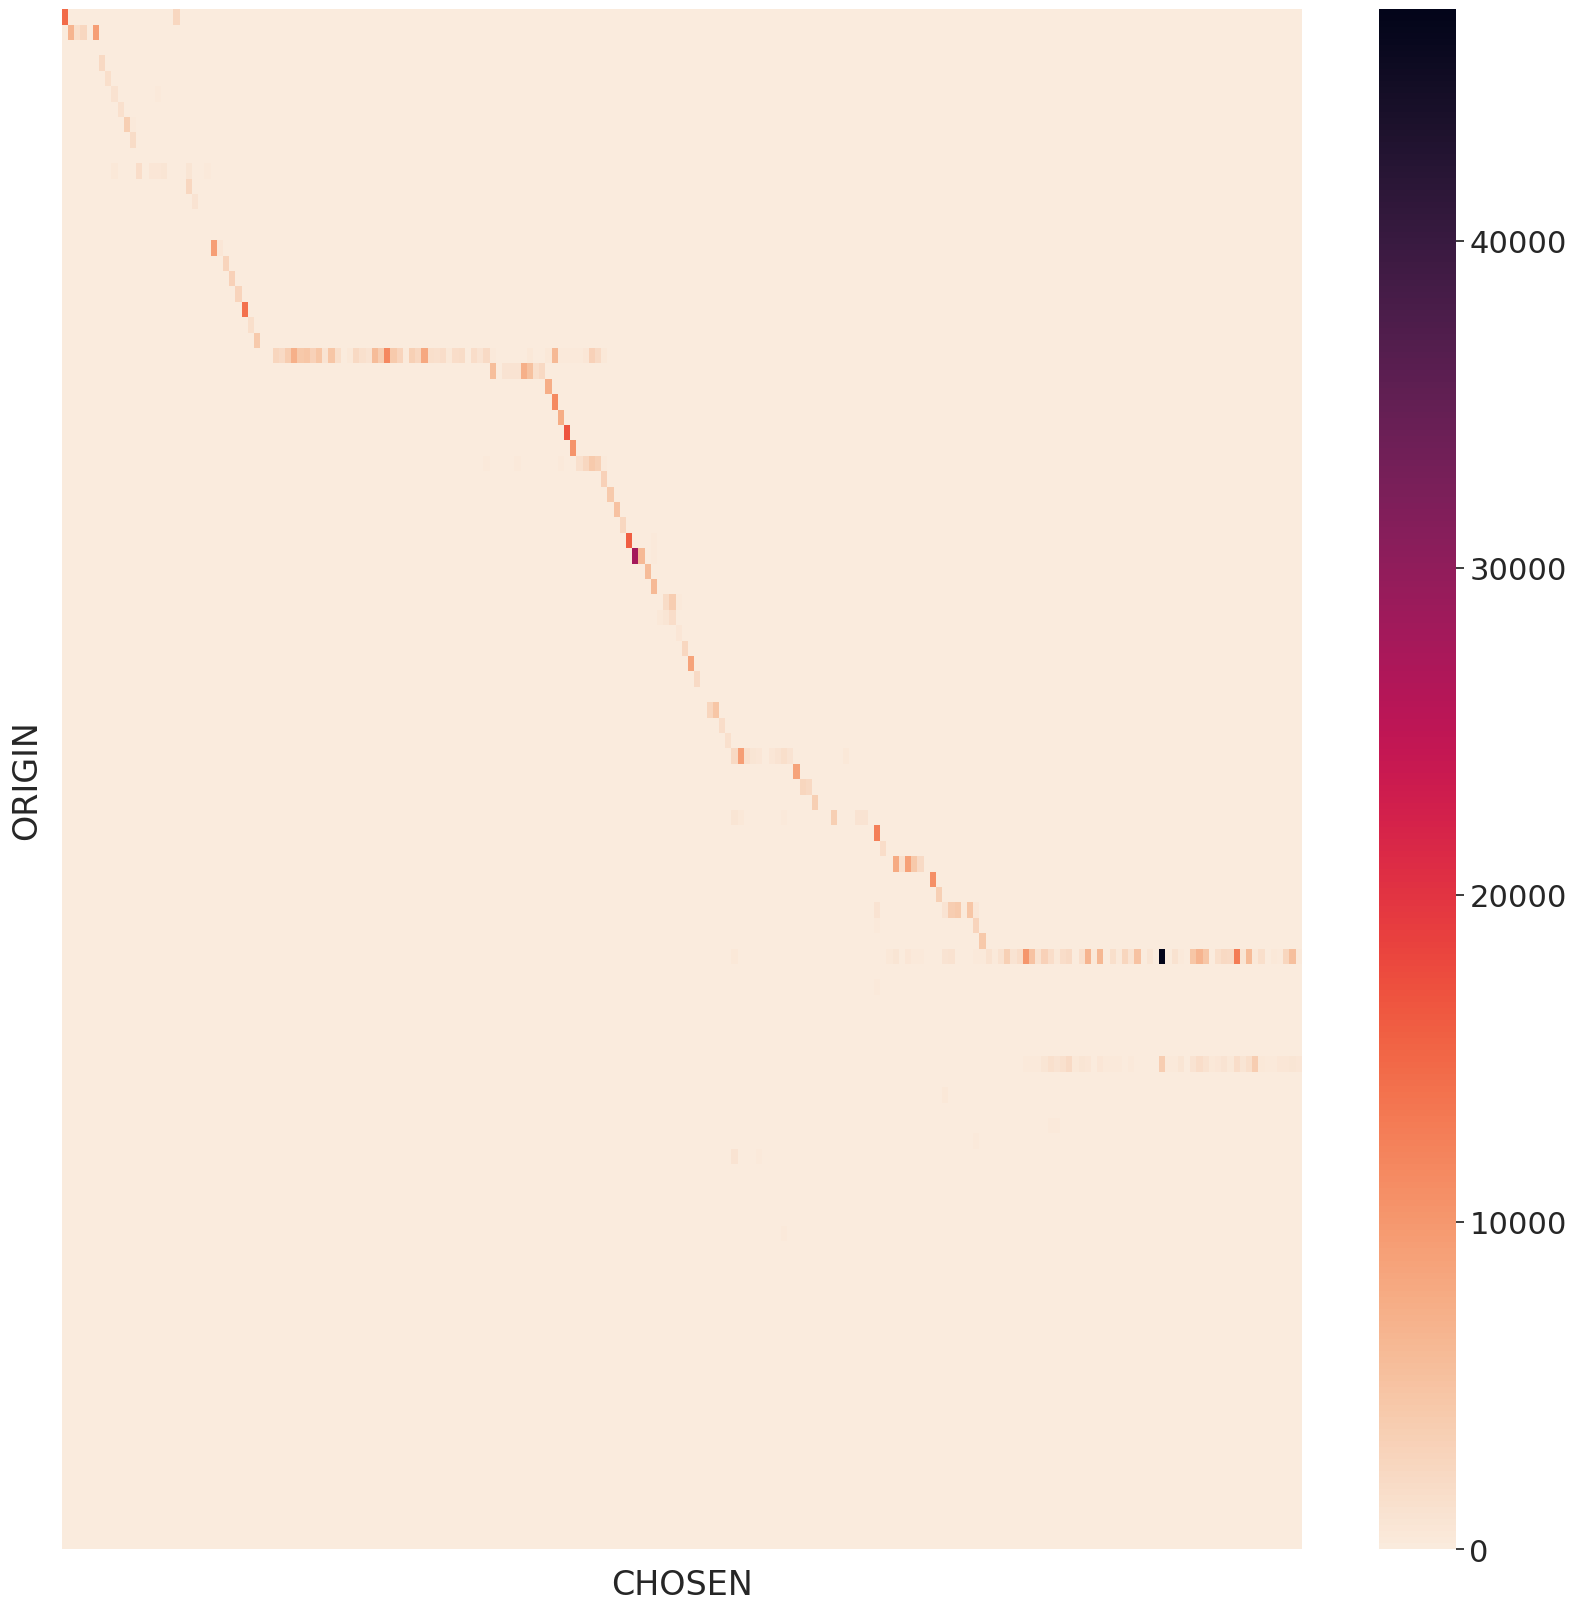

In [82]:
plt.figure(figsize=(20, 20))
fig = sns.heatmap(
    ((actual_flows - predicted_flows) ** 2.0).iloc[:100, :200],
    cmap=sns.color_palette("rocket_r", as_cmap=True),
)
fig.set(xticklabels=[], yticklabels=[])

In [73]:
stay = probs.iloc[:, :1].sum()
stay

0    2.202914e+06
dtype: float64

In [75]:
non_stay = probs.loc[:, 1:]

In [79]:
migrants_prob = pd.DataFrame(data=0, index=distances.index, columns=puma_recodes.index)

In [80]:
for i, row in tqdm(non_stay.iterrows(), total=non_stay.shape[0]):
    origin = df.loc[i, "ORIGIN"]
    migrants_prob.loc[origin] += row.values

100%|██████████| 2530899/2530899 [09:51<00:00, 4276.32it/s]


In [82]:
migrants_prob = migrants_prob.sort_index().sort_index(axis=1)
migrants_prob

,100100,100200,100301,100302,100400,100500,100600,100700,100800,100900,...,5555102,5555103,5570101,5570201,5570301,5600100,5600200,5600300,5600400,5600500
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100190,3.625534,2.964174,1.817401,1.256991,5.628748,6.596456,2.327378,7.172233,1.487891,1.032863,...,0.019357,0.044684,0.039524,0.047626,0.039875,0.075754,0.060152,0.099404,0.076272,0.060775
100290,3.850250,158.956602,99.480243,68.234986,4.752997,7.758249,4.239051,3.639933,2.942575,2.171138,...,0.028313,0.077592,0.067469,0.083284,0.070329,0.048016,0.037549,0.065785,0.048445,0.038173
100400,0.819092,1.375580,0.867553,0.640785,99.238979,3.817059,0.843597,2.170678,0.694189,0.619114,...,0.007815,0.017288,0.016300,0.020246,0.016743,0.031333,0.024889,0.038351,0.031588,0.025168
100600,1.391462,2.033431,1.233281,0.836810,1.240306,1.421527,29.410781,1.557032,0.867103,0.635580,...,0.008044,0.021618,0.019421,0.023991,0.019960,0.014117,0.011087,0.018502,0.014162,0.011258
100700,0.883814,1.145375,0.702420,0.501869,2.215982,2.991861,1.080437,48.945650,0.692199,0.495441,...,0.006640,0.014776,0.013797,0.017042,0.014206,0.027516,0.021850,0.034044,0.027862,0.022036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600100,0.007837,0.010049,0.006189,0.004368,0.020907,0.022070,0.006735,0.018986,0.005428,0.004038,...,0.005691,0.012088,0.008540,0.009889,0.008103,2.618425,0.859836,1.004774,1.118018,1.120079
5600200,0.008002,0.010115,0.006246,0.004427,0.021535,0.022433,0.006848,0.019453,0.005546,0.004128,...,0.005991,0.012861,0.008738,0.010248,0.008475,1.102535,5.331531,1.217115,1.252353,0.870221
5600300,0.011028,0.014373,0.009106,0.006077,0.027544,0.029389,0.009080,0.025066,0.007267,0.005390,...,0.006532,0.015180,0.010002,0.011539,0.010148,1.068068,0.985730,34.866284,1.586568,0.951370


In [ ]:
# # exmaple
# puma = 5401300
# tot_pop = puma_acs_data.loc[puma, "Total Population"]
# dists = distances.loc[df["ORIGIN"].values, puma]
# cbsa_num = cbsas.loc[puma, 'Name_num']
# cbsa_type = cbsas.loc[puma, "type_num"]
# hh_cost = leave_puma.loc[puma, "HH_COST"]
# pincp = leave_puma.loc[puma, "PINCP"]
# unemp = leave_puma.loc[puma, "UNEMP"]
# emp = leave_puma.loc[puma, "EMP"]
# unemp_rate = unemp / (emp + unemp)
# foreign = puma_acs_data.loc[puma, "Total Population Foreign Born"]
# age_18_34 = puma_acs_data.loc[puma, "Total Population 18 to 34 Years"]
# age_35_64 = puma_acs_data.loc[puma, "Total Population 35 to 64 Years"]
# age_65 = puma_acs_data.loc[puma, "Total Population 65 and Over"]
# mil_num = puma_acs_data.loc[puma, "Population 16 Years and Over in Labor Force in Armed Forces"]
# tot_emp = puma_lodes_data.loc[puma, "TOT_JOBS"]
# ent = puma_lodes_data.loc[puma, "ENT"]
# own_job = puma_lodes_data.loc[puma, df["NAICS"]]
# state_num = puma_migpuma.loc[puma, "State"]
# college = puma_acs_data.loc[puma, "COLLEGE"]

# np.log(tot_pop)  \
#         + (df["CBSA_NAME_ORIG"].values != cbsa_num) * (c_destchoice_dist * dists.values + c_destchoice_logdist * np.log(dists + 1)) \
#         + (df["CBSA_NAME_ORIG"].values == cbsa_num) * c_destchoice_cbsa_dist * dists.values \
#         + c_destchoice_hhcost * hh_cost + c_destchoice_college * df["IN_COLLEGE"].values * college + c_destchoice_foreign * df["FOREIGN"].values * foreign / tot_pop \
#         + c_destchoice_age_18_34 * df["AGE_18_34"].values * age_18_34 / tot_pop + c_destchoice_age_35_64 * df["AGE_35_64"].values * age_35_64 / tot_pop + c_destchoice_age_over_65 * df["AGE_OVER_65"].values * age_65 / tot_pop \
#         + ent / (tot_emp + 1) * (c_destchoice_entscore_18_34 * df["AGE_18_34"].values + c_destchoice_entscore_35_64 * df["AGE_35_64"].values + c_destchoice_entscore_65 * df["AGE_OVER_65"].values) \
#         + df["IN_LF"].values * (c_destchoice_unemp_rate * unemp_rate + c_destchoice_pincp * pincp) \
#         + (c_destchoice_Metro_T34 * df["METRO"].values + c_destchoice_Micro_T34 * df["MICRO_adj_ORIG"].values) * (cbsa_type == 0) \
#         + (c_destchoice_T34_Metro * df["T34"].values + c_destchoice_Metro_Metro * df["METRO"].values + c_destchoice_Micro_Metro * df["MICRO_adj_ORIG"].values) * (cbsa_type == 1) \
#         + (c_destchoice_T34_Micro * df["T34"].values + c_destchoice_Metro_Micro * df["METRO"].values + c_destchoice_Micro_Micro * df["MICRO_adj_ORIG"].values) * (cbsa_type == 2) \
#         + (c_destchoice_geo_spec_job * df["AGR_EXT"].values + c_destchoice_high_ed_job * df["HIGH_ED"].values + c_destchoice_license_job * df["LICENSE"].values + c_destchoice_other * df["OTHER_JOB"].values) * own_job.values / (tot_emp + 1) + c_destchoice_military * df["MILITARY"].values * mil_num \
#         + c_destchoice_birthstate * (df["POBP"].values == state_num) + c_destchoice_samecbsa * (df["CBSA_NAME_ORIG"].values == cbsa_num) + c_destchoice_samestate * (df["MIGSP"].values == state_num)

In [ ]:
# old utility formula (has issues when multiplying pandas dfs with index matching)
# utilities[:, index] = np.log(tot_pop)  \
#     + (df["CBSA_NAME_ORIG"] != cbsa_num).values * (c_destchoice_dist * dists + c_destchoice_logdist * np.log(dists + 1)) \
#     + (df["CBSA_NAME_ORIG"] == cbsa_num).values * c_destchoice_cbsa_dist * dists \
#     + c_destchoice_hhcost * hh_cost + c_destchoice_college * df["IN_COLLEGE"] * college + c_destchoice_foreign * df["FOREIGN"] * foreign / tot_pop \
#     + c_destchoice_age_18_34 * df["AGE_18_34"] * age_18_34 / tot_pop + c_destchoice_age_35_64 * df["AGE_35_64"] * age_35_64 / tot_pop + c_destchoice_age_over_65 * df["AGE_OVER_65"] * age_65 / tot_pop \
#     + ent / (tot_emp + 1) * (c_destchoice_entscore_18_34 * age_18_34 + c_destchoice_entscore_35_64 * age_35_64 + c_destchoice_entscore_65 * age_65) \
#     + df["IN_LF"] * (c_destchoice_unemp_rate * unemp_rate + c_destchoice_pincp * pincp) \
#     + (c_destchoice_Metro_T34 * df["METRO"] + c_destchoice_Micro_T34 * df["MICRO_adj_ORIG"]) * (cbsa_type == 0) \
#     + (c_destchoice_T34_Metro * df["T34"] + c_destchoice_Metro_Metro * df["METRO"] + c_destchoice_Micro_Metro * df["MICRO_adj_ORIG"]) * (cbsa_type == 1) \
#     + (c_destchoice_T34_Micro * df["T34"] + c_destchoice_Metro_Micro * df["METRO"] + c_destchoice_Micro_Micro * df["MICRO_adj_ORIG"]) * (cbsa_type == 2) \
#     + (c_destchoice_geo_spec_job * df["AGR_EXT"] + c_destchoice_high_ed_job * df["HIGH_ED"] + c_destchoice_license_job * df["LICENSE"] + c_destchoice_other * df["OTHER_JOB"]) * own_job / (tot_emp + 1) + c_destchoice_military * df["MILITARY"] * mil_num \
#     + c_destchoice_birthstate * (df["POBP"] == state_num) + c_destchoice_samecbsa * (df["CBSA_NAME_ORIG"] == cbsa_num) + c_destchoice_samestate * (df["MIGSP"] == state_num)